# Análisis exploratorio de los datos

## Introducción

Ya tenemos los datos limpios.  Ejecutamos un análisis exploratorio...

Al trabajar con datos numéricos, habitualmente obtenemos estadísticos comunes como valores medios o cómo se distribuyen los datos, sus valores más habituales, ... La idea al trabajar con textos es la misma. Buscaremos patrones obvios a través del análisis exploratorio para luego centrarnos en los patrones ocultos a través de Machine Learning. De cada uno de los textos extraidos, buscaremos:

1. **Palabras más comunes** - localizarlas y crear un word cloud
2. **Total palabras únicas** - buscaremos las palabras únicas
3. **Total palabrotas**

## Palabras más comunes

### Análisis

In [2]:
# Leemos el document-term matrix generado en el notebook previo
import pandas as pd
import os

os.chdir(r"C:\Users\borja\OneDrive\Documents\C2B\Bootcamp\Módulo 8\Módulo 8\scripts\15.PLN")
datos = pd.read_pickle('dtm.pkl')
datos = datos.transpose()
datos.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [3]:
# Localizamos el top 30 de las palabras usadas por cada cómico.
top_dict = {}
for c in datos.columns:
    top = datos[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('gotta', 21),
  ('oh', 21),
  ('wanna', 21),
  ('husband', 20),
  ('got', 19),
  ('time', 19),
  ('right', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('hes', 14),
  ('need', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13),
  ('theyre', 12),
  ('dude', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('got', 34),
  ('joke', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('day', 26),
  ('say', 26),
  ('just', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('grandma', 18),
  ('right', 18),
  ('time', 17),
  ('think', 17),
  ('thing', 17),
  ('school', 16),
  ('jokes', 16),
  ('yeah', 16),
  ('did', 16),
  ('good', 16),
  ('okay', 15),
  ('gonna', 15),
  ('ive', 15),
  ('baby', 15)],
 

In [4]:
# ¿Cuáles son las 15 palabras más dichas por cada cómico?
for comico, top_words in top_dict.items():
    print(comico)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, gotta, oh, wanna
---
anthony
im, like, know, dont, got, joke, thats, said, anthony, day, say, just, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
know, like, think, love, im, bo, just, stuff, repeat, dont, yeah, want, right, cos
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, fuck, thats, fucking
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
---
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, think
---
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, got, time
---
louis
like, just, know, dont, thats, im, youre, life, people, thing, gonna, hes, cause, theres
---
mike
like, im, know, said, just, dont, think, tha

**NOTA:** A través del resultado obtenido podríamos obtener las nubes de palabras, pero podemos ver que hay términos que aportan poco.  Estos términos pueden añadirse a las stopwords...



In [5]:
# Extraeremos ahora el top 30 de todos los cómicos.
from collections import Counter

palabras = []
for comico in datos.columns:
    top = [palabras for (palabras, count) in top_dict[comico]]
    for t in top:
        palabras.append(t)
        
palabras

['like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'oh',
 'wanna',
 'husband',
 'got',
 'time',
 'right',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'hes',
 'need',
 'god',
 'yeah',
 'tell',
 'theyre',
 'dude',
 'im',
 'like',
 'know',
 'dont',
 'got',
 'joke',
 'thats',
 'said',
 'anthony',
 'day',
 'say',
 'just',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'time',
 'think',
 'thing',
 'school',
 'jokes',
 'yeah',
 'did',
 'good',
 'okay',
 'gonna',
 'ive',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'think',
 'fuck',
 'want',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'doing',
 'know',
 'like',
 'think',
 'love',
 'im',
 'bo',
 'just',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'eye',
 'said',
 'people',
 'fucki

In [6]:
# Obtenemos la frecuencia de aparición de cada palabra
Counter(palabras).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('really', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('b

In [7]:
# Si más de la mitad de los cómicos tienen alguna de estas palabras en su top, la eliminamos.
# De esta manera, eliminamos palabras comunes y nos centramos en las que caracterizan a cada cómico.
add_stop_words = [palabra for palabra, count in Counter(palabras).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'oh',
 'yeah',
 'said']

In [9]:
# Actualizamos nuestro document-term matrix con la nueva lista de stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Cargamos los datos limpios generados previamente.
datos_limpios = pd.read_pickle('datos_limpios.pkl')

# Añadimos las nuevas stop words
#stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Volvemos a generar el document-term matrix
cv = CountVectorizer(stop_words="english")
datos_cv = cv.fit_transform(datos_limpios ['transcripcion'])
data_stop = pd.DataFrame(datos_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = datos_limpios.index

# Guardamos en formato pickle para su uso más adelante (scritp 4).
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [12]:
# Un poco de color.  Generamos algunas nubes de palabras.
# Desde un terminal Anaconda: conda install -c conda-forge wordcloud 
# ó
#!pip install wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

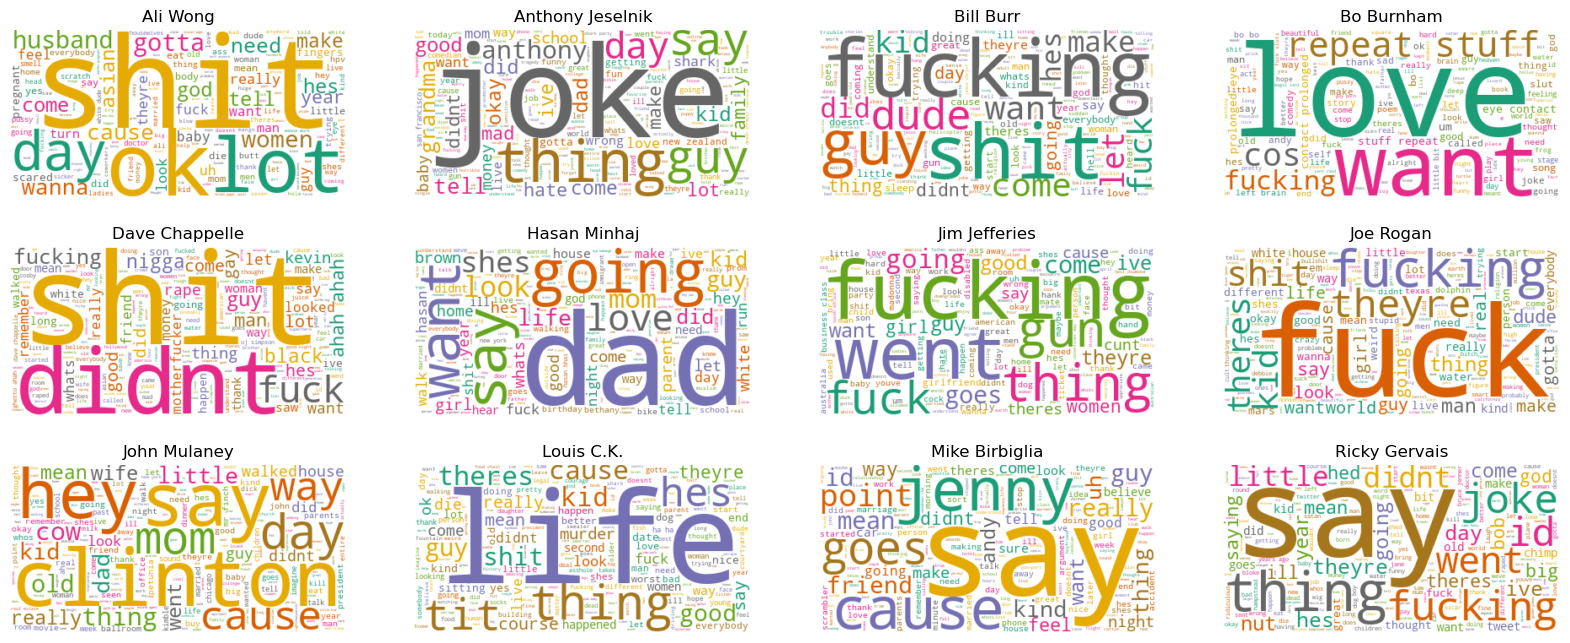

In [13]:
# Reset de las dimensiones de salida
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 8]

nombres_completos = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
                     'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Subplot para cada cómico
for index, comico in enumerate(datos.columns):
    wc.generate(datos_limpios['transcripcion'][comico])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(nombres_completos[index])
    
plt.show()

### Insigths

* Ali Wong usa mucho la palabra shit y después la palabra husband.
* Ricky Gervais usa principalmente 2 palabras y el resto tienen apariciones similares.
* Muchos de los cómicos usan la palabra Fuck

## Número de palabras

### Analisis

In [14]:
# Buscaremos ahora el total de palabras (sin repetir) por cómico y nos quedamos 
# con aquellas palabras que aparezcan al menos una vez
lista_unicos = []
for comico in datos.columns:
    unicos = datos[comico].to_numpy().nonzero()[0].size
    lista_unicos.append(unicos)

# Creamos un dataframe con el resultado.
datos_palabras = pd.DataFrame(list(zip(nombres_completos, lista_unicos)), columns=['comico', 'palabras_unicas'])
datos_unicos_ordenado = datos_palabras.sort_values(by='palabras_unicas')
datos_unicos_ordenado

,comico,palabras_unicas
1,Anthony Jeselnik,984
9,Louis C.K.,1098
3,Bo Burnham,1272
6,Jim Jefferies,1313
0,Ali Wong,1341
8,John Mulaney,1391
4,Dave Chappelle,1404
7,Joe Rogan,1435
10,Mike Birbiglia,1494
5,Hasan Minhaj,1559


In [15]:
# Calcularemos ahora el total de palabras pronunciadas por minuto por cada cómico.
# Los tiempos de cada actuación han sido:
# Ali Wong: 60
# Anthony Jeselnik: 59
# Bill Burr: 80
# Bo Burnham: 60
# Dave Chappelle: 67
# Hasan Minhaj: 73
# Jim Jefferies: 77
# Joe Rogan: 63
# John Mulaney: 62
# Louis C.K.: 58
# Mike Birbiglia: 76
# Ricky Gervais: 79

duracion_actuacion = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Total de palabras usadas por cada cómico.
lista_total = []
for comico in datos.columns:
    totales = sum(datos[comico])
    lista_total.append(totales)
    
# Enriquecemos el set de datos con nuevas variables construidas
datos_palabras['palabras_totales'] = lista_total
datos_palabras['duracion_actuacion'] = duracion_actuacion
# palabras por minuto
datos_palabras['ppm'] = datos_palabras['palabras_totales'] / datos_palabras['duracion_actuacion']

# Ordenamos el dataset por el total de palabras por minuto
datos_palabras_ordenado = datos_palabras.sort_values(by='ppm')
datos_palabras_ordenado

,comico,palabras_unicas,palabras_totales,duracion_actuacion,ppm
1,Anthony Jeselnik,984,2905,59,49.237288
3,Bo Burnham,1272,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1404,4094,67,61.104478
6,Jim Jefferies,1313,4764,77,61.870130
10,Mike Birbiglia,1494,4741,76,62.381579
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1391,4001,62,64.532258
5,Hasan Minhaj,1559,4777,73,65.438356


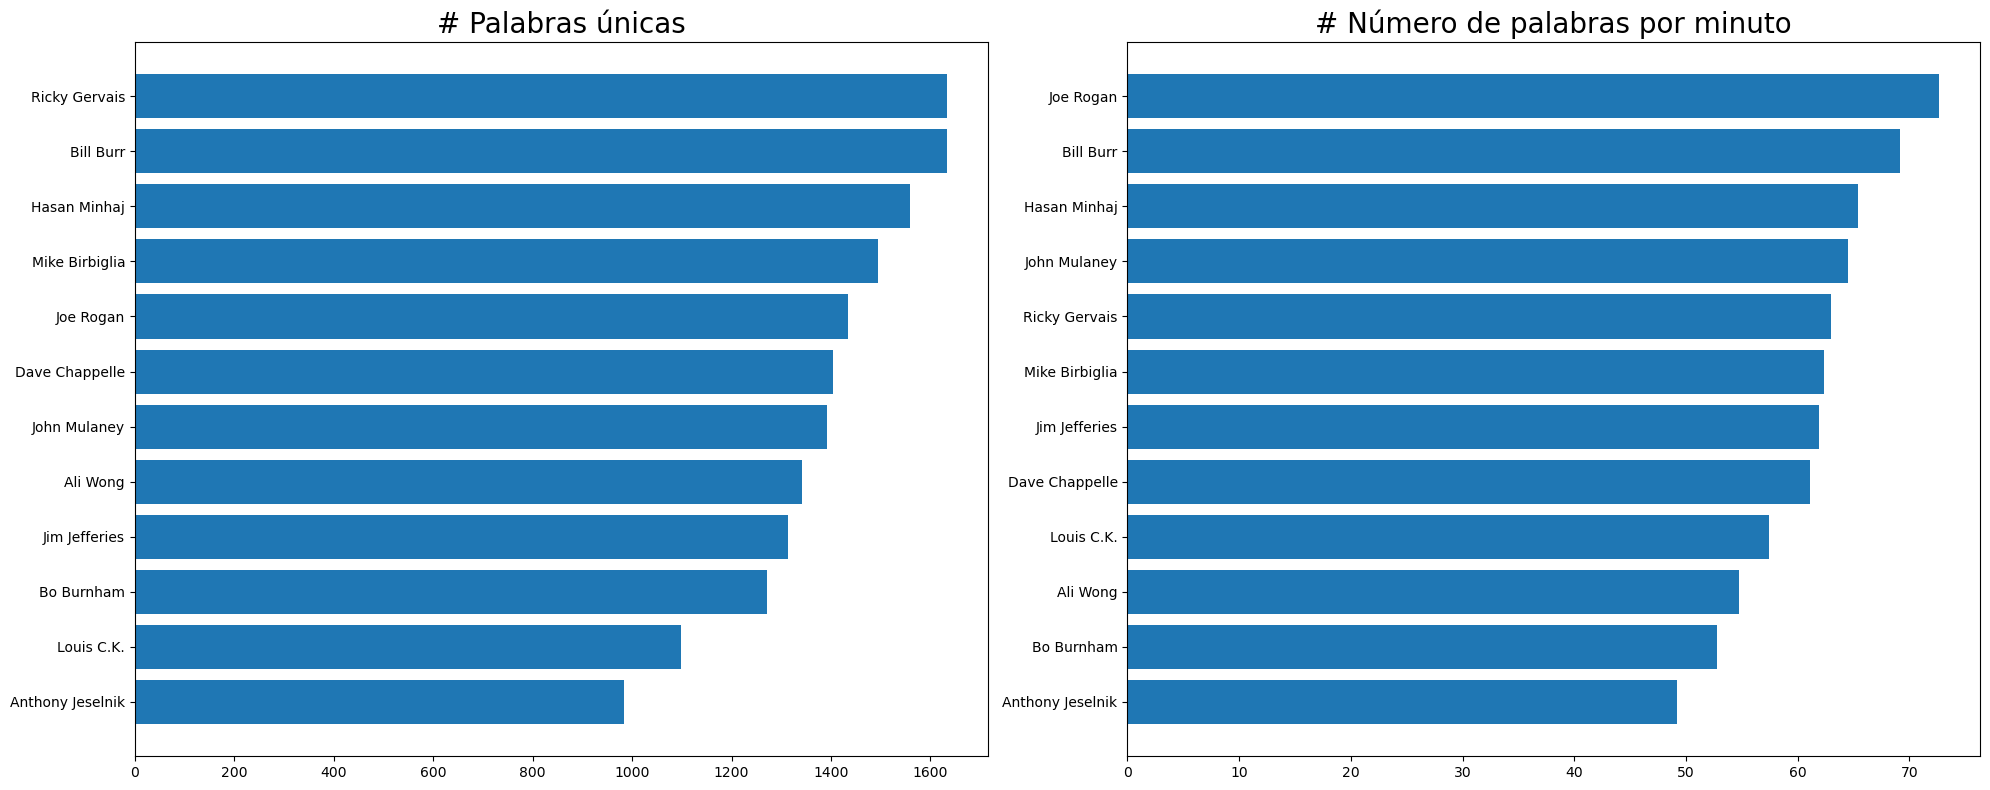

In [16]:
# Un poco más de color.  Ploteamos...

import numpy as np
y_pos = np.arange(len(datos_palabras))

plt.subplot(1, 2, 1)
plt.barh(y_pos, datos_unicos_ordenado['palabras_unicas'], align='center')
plt.yticks(y_pos, datos_unicos_ordenado.comico)
plt.title('# Palabras únicas', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, datos_palabras_ordenado.ppm, align='center')
plt.yticks(y_pos, datos_palabras_ordenado.comico)
plt.title('# Número de palabras por minuto', fontsize=20)

plt.tight_layout()
plt.show()

### Insigths

* **Vocabulario**
   * Ricky Gervais y Bill Burr usan muchas palabras en su actuación.


* **Palabras por minuto**
   * Joe Rogan y Bill Burr son los que más rápido hablan


## Total de palabrotas

### Analisis

In [17]:
Counter(palabras).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('really', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('b

In [18]:
datos.transpose()[['fucking', 'fuck', 'shit']]

,fucking,fuck,shit
ali,5,11,34
anthony,6,9,9
bill,70,36,63
bo,22,15,6
dave,32,33,45
hasan,8,16,15
jim,78,37,20
joe,69,66,40
john,2,2,6
louis,6,15,25


In [19]:
# Extraemos las palabrotas
# Me quedo con las columnas del corpus con las palabrotas
datos_tmp = datos.transpose()[['fucking', 'fuck', 'shit']]

datos_palabrotas = pd.concat([datos_tmp['fucking'] + datos_tmp['fuck'], datos_tmp['shit']], axis=1)
datos_palabrotas.columns = ['fuck', 'shit']
datos_palabrotas

,fuck,shit
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


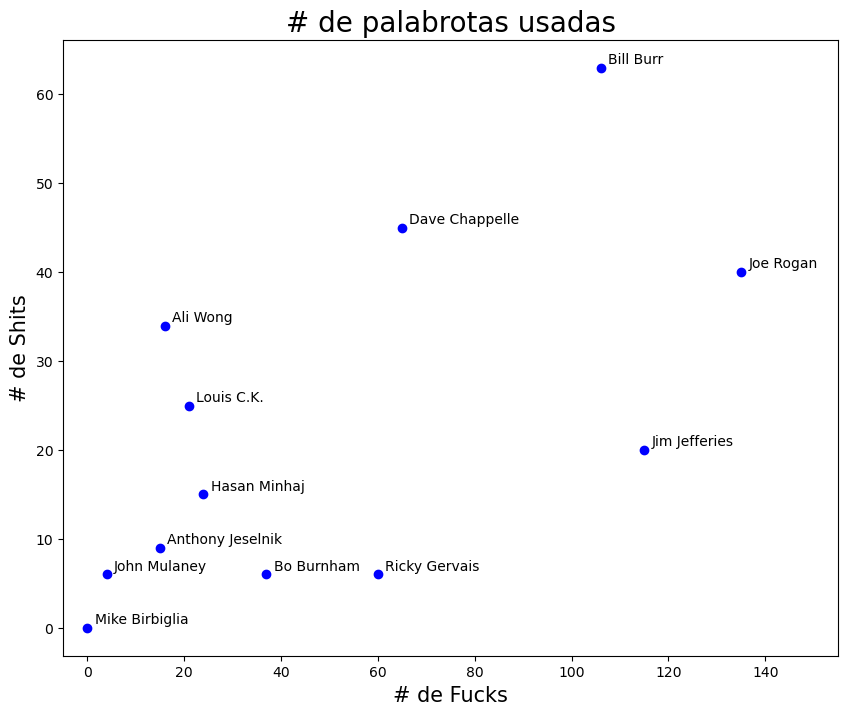

In [20]:
# Representamos los datos en un scatter plot
plt.rcParams['figure.figsize'] = [10, 8]

for i, comico in enumerate(datos_palabrotas.index):
    x = datos_palabrotas.fuck.loc[comico]
    y = datos_palabrotas.shit.loc[comico]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, nombres_completos[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('# de palabrotas usadas', fontsize=20)
plt.xlabel('# de Fucks', fontsize=15)
plt.ylabel('# de Shits', fontsize=15)

plt.show()

## Ejercicios

1. ¿Qué otras palabras crees que podría ser interesante comparar?

## Análisis bigramas

In [21]:
datos_limpios ['transcripcion']

ali        ladies and gentlemen please welcome to the sta...
anthony    thank you thank you thank you san francisco th...
bill        all right thank you thank you very much thank...
bo         bo what old macdonald had a farm e i e i o and...
dave       this is dave he tells dirty jokes for a living...
hasan        whats up davis whats up im home i had to bri...
jim           ladies and gentlemen please welcome to the ...
joe           ladies and gentlemen welcome joe rogan  wha...
john       all right petunia wish me luck out there you w...
louis      introfade the music out lets roll hold there l...
mike       wow hey thank you thanks thank you guys hey se...
ricky      hello hello how you doing great thank you wow ...
Name: transcripcion, dtype: object

In [22]:
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(datos_limpios ['transcripcion'])  
features = (vectorizer.get_feature_names_out()) 
print("\n\nBigramas : \n", features) 
print("\n\nX1 : \n", X1.toarray()) 



Bigramas : 
 ['aaaaah anybody else' 'aaaaahhhhhhh oh my' 'aaaaauuugghhhhhh its so' ...
 'zoning laws theyll' 'zoo and people' 'éclair you know']


X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [23]:
# Aplicando TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(datos_limpios ['transcripcion']) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 



Scores : 
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00897992 0.         0.         ... 0.00897992 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.00977338 0.        ]]


In [ ]:
# Extraemos los bigramas Top
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    print(col, term)
    data1.append( (term, sums[0,col] )) 
    ranking = pd.DataFrame(data1, columns = ['bigrama','rank']) 
    words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nBigramas : \n", words.head(20)) 

0 aaaaah anybody else
1 aaaaahhhhhhh oh my
2 aaaaauuugghhhhhh its so
3 aaaahhhhh aaaaahhhhhhh oh
4 aaah shit is
5 aah aah aah
6 aah aah were
7 aah were the
8 abc yeah which
9 abcs you know
10 ability to speak
11 ability to transform
12 abject poverty he
13 able to add
14 able to afford
15 able to be
16 able to deal
17 able to find
18 able to handle
19 able to have
20 able to smell
21 able to steal
22 able to take
23 able to that
24 able to use
25 able to write
26 ablebodied olympics in
27 ablebodied people alike
28 abortion clinic you
29 abortion clinics everywhere
30 abortions its for
31 about adopting yeah
32 about aids cancer
33 about all of
34 about all the
35 about all this
36 about anal and
37 about and by
38 about and honestly
39 about and then
40 about and was
41 about animal cruelty
42 about animals now
43 about animals right
44 about another human
45 about any of
46 about anyone like
47 about anything when
48 about as much
49 about aurora whats
50 about bad call
51 about bad 

Tenemos los bigramas más habituales.  Ahora podríamos eliminar los que consideremos que no aportan a nuestro análisis como por ej. 'in the' o 'on the'.
En este caso no eliminaremos ni bigramas ni trigramas.